<a href="https://colab.research.google.com/github/pandi018/Kidney_disease_prediction/blob/main/kidney_disease_prediction_final_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
#install kaggle
!pip install -q kaggle

In [202]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"pandiar","key":"d2657d0fd8db91030984d21e811aa0d3"}'}

In [203]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [204]:
#copy the kaggle.json to folder 
! cp kaggle.json ~/.kaggle/

In [205]:
#permission for the json to act 
! chmod 600 ~/.kaggle/kaggle.json

In [206]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31           9759        331  1.0              
googleai/musiccaps                                              MusicCaps                                          793KB  2023-01-25 09:25:48           2078        198  0.9411765        
themrityunjaypathak/most-subscribed-1000-youtube-channels       Most Subscribed 1000 Youtube Channels               28KB  2023-01-21 14:42:05           2711         88  1.0              
nitishsharma01/olympics-124-years-datasettill-2020              O

In [207]:
!kaggle datasets download -d colearninglounge/chronic-kidney-disease

chronic-kidney-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [208]:
!unzip chronic-kidney-disease.zip

Archive:  chronic-kidney-disease.zip
replace kidney_disease_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kidney_disease_test.csv  
replace kidney_disease_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kidney_disease_train.csv  


In [209]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [211]:
p=pd.read_csv('./kidney_disease_train.csv')

In [212]:
p.head(3)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd


In [213]:
p.describe

<bound method NDFrame.describe of       id   age     bp     sg   al   su     rbc        pc         pcc  \
0    157  62.0   70.0  1.025  3.0  0.0  normal  abnormal  notpresent   
1    109  54.0   70.0    NaN  NaN  NaN     NaN       NaN  notpresent   
2     17  47.0   80.0    NaN  NaN  NaN     NaN       NaN  notpresent   
3    347  43.0   60.0  1.025  0.0  0.0  normal    normal  notpresent   
4     24  42.0  100.0  1.015  4.0  0.0  normal  abnormal  notpresent   
..   ...   ...    ...    ...  ...  ...     ...       ...         ...   
275   71  46.0   60.0  1.010  1.0  0.0  normal    normal  notpresent   
276  106  50.0   90.0    NaN  NaN  NaN     NaN       NaN  notpresent   
277  270  23.0   80.0  1.025  0.0  0.0  normal    normal  notpresent   
278  348  38.0   80.0  1.020  0.0  0.0  normal    normal  notpresent   
279  102  17.0   60.0  1.010  0.0  0.0     NaN    normal  notpresent   

             ba  ...   pcv     wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  39.0 

In [214]:
p.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id    age     bp     sg     al     su    rbc     pc    pcc     ba  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False   True   True   True   True   True  False  False   
2    False  False  False   True   True   True   True   True  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275  False  False  False  False  False  False  False  False  False  False   
276  False  False  False   True   True   True   True   True  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False   True  False  False  False   

     ...    p

In [215]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [216]:
p.shape

(280, 26)

<BarContainer object of 26 artists>

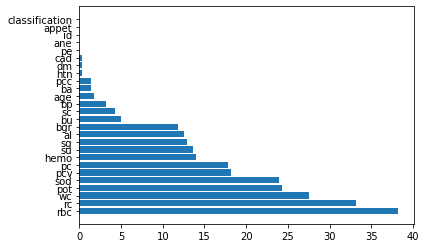

In [217]:
missing_values = (p.isnull().sum()/len(p)) * 100                 
missing_values.sort_values(ascending=False,inplace=True)
plt.barh(y=missing_values.index,width= missing_values.values)

In [218]:
p['classification'].replace({'ckd':1,'notckd':0},inplace=True) 
p.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,1
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,1


In [219]:
p.select_dtypes('object').nunique()

rbc       2
pc        2
pcc       2
ba        2
wc       78
rc       48
htn       2
dm        4
cad       3
appet     2
pe        2
ane       2
dtype: int64

In [220]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

Text(0, 0.5, 'Classification')

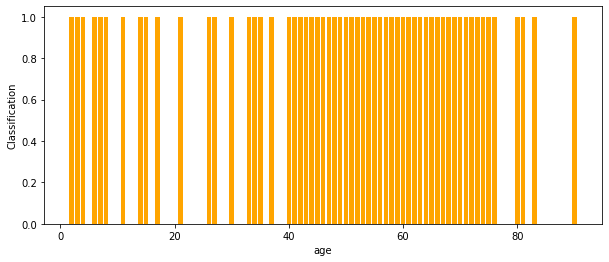

In [221]:
plt.figure(figsize=(10,4))
plt.bar(x=p['age'],height=p['classification'],color="orange")
plt.xlabel("age")
plt.ylabel("Classification")

Text(0, 0.5, 'classification')

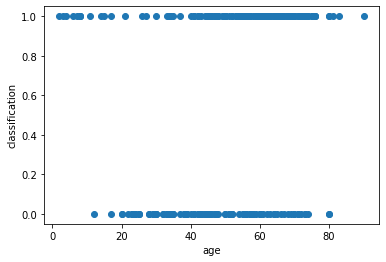

In [222]:
plt.scatter(p['age'],p['classification'])
plt.xlabel("age")
plt.ylabel("classification")

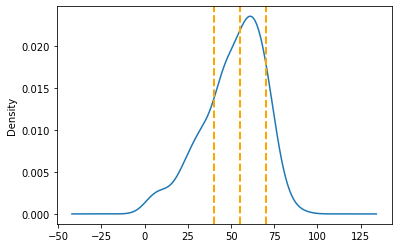

In [223]:
p['age'].plot.density()
plt.axvline(color="orange",x=40,linestyle="--",linewidth="2")
plt.axvline(color="orange",x=55,linestyle="--",linewidth="2")
plt.axvline(color="orange",x=70,linestyle="--",linewidth="2")

In [224]:
p.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,1
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,1
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,0
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,1


In [225]:
p['classification'].shape

(280,)

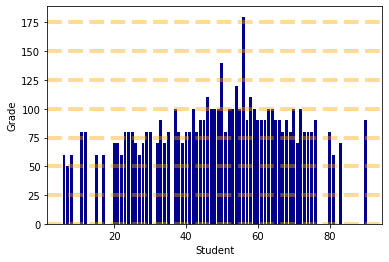

In [226]:
plt.bar(x=p['age'],height=p['bp'],color="darkblue")
# Customize the chart
# plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.grid(color="orange",linestyle="dashed",axis='y',alpha=0.4,linewidth=4)
# plt.xticks(rotation=90)


In [227]:
p.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,classification
id,1.000000,-0.203297,-0.241728,0.686117,-0.529140,-0.310249,-0.413028,-0.290575,-0.279816,0.359202,-0.117775,0.623203,0.616304,-0.835381
age,-0.203297,1.000000,0.159061,-0.216672,0.141512,0.182331,0.248271,0.197669,0.137053,-0.125302,0.059592,-0.244506,-0.244597,0.256630
bp,-0.241728,0.159061,1.000000,-0.226841,0.115326,0.222696,0.149322,0.163732,0.165294,-0.086903,0.093219,-0.298948,-0.316792,0.276949
sg,0.686117,-0.216672,-0.226841,1.000000,-0.467827,-0.278341,-0.382860,-0.341058,-0.405656,0.440390,-0.098296,0.634550,0.652851,-0.757986
al,-0.529140,0.141512,0.115326,-0.467827,1.000000,0.306732,0.460787,0.445732,0.353454,-0.433237,0.151559,-0.640496,-0.621318,0.635497
su,-0.310249,0.182331,0.222696,-0.278341,0.306732,1.000000,0.650541,0.197614,0.295447,-0.125928,0.289096,-0.272691,-0.289357,0.352065
bgr,-0.413028,0.248271,0.149322,-0.382860,0.460787,0.650541,1.000000,0.147776,0.147585,-0.302412,0.099336,-0.342712,-0.332651,0.446966
bu,-0.290575,0.197669,0.163732,-0.341058,0.445732,0.197614,0.147776,1.000000,0.609569,-0.276002,0.399230,-0.592364,-0.573527,0.365920
sc,-0.279816,0.137053,0.165294,-0.405656,0.353454,0.295447,0.147585,0.609569,1.000000,-0.714504,0.358307,-0.339347,-0.338642,0.285913
sod,0.359202,-0.125302,-0.086903,0.440390,-0.433237,-0.125928,-0.302412,-0.276002,-0.714504,1.000000,0.127225,0.317406,0.335550,-0.354435


In [228]:
import seaborn as sns

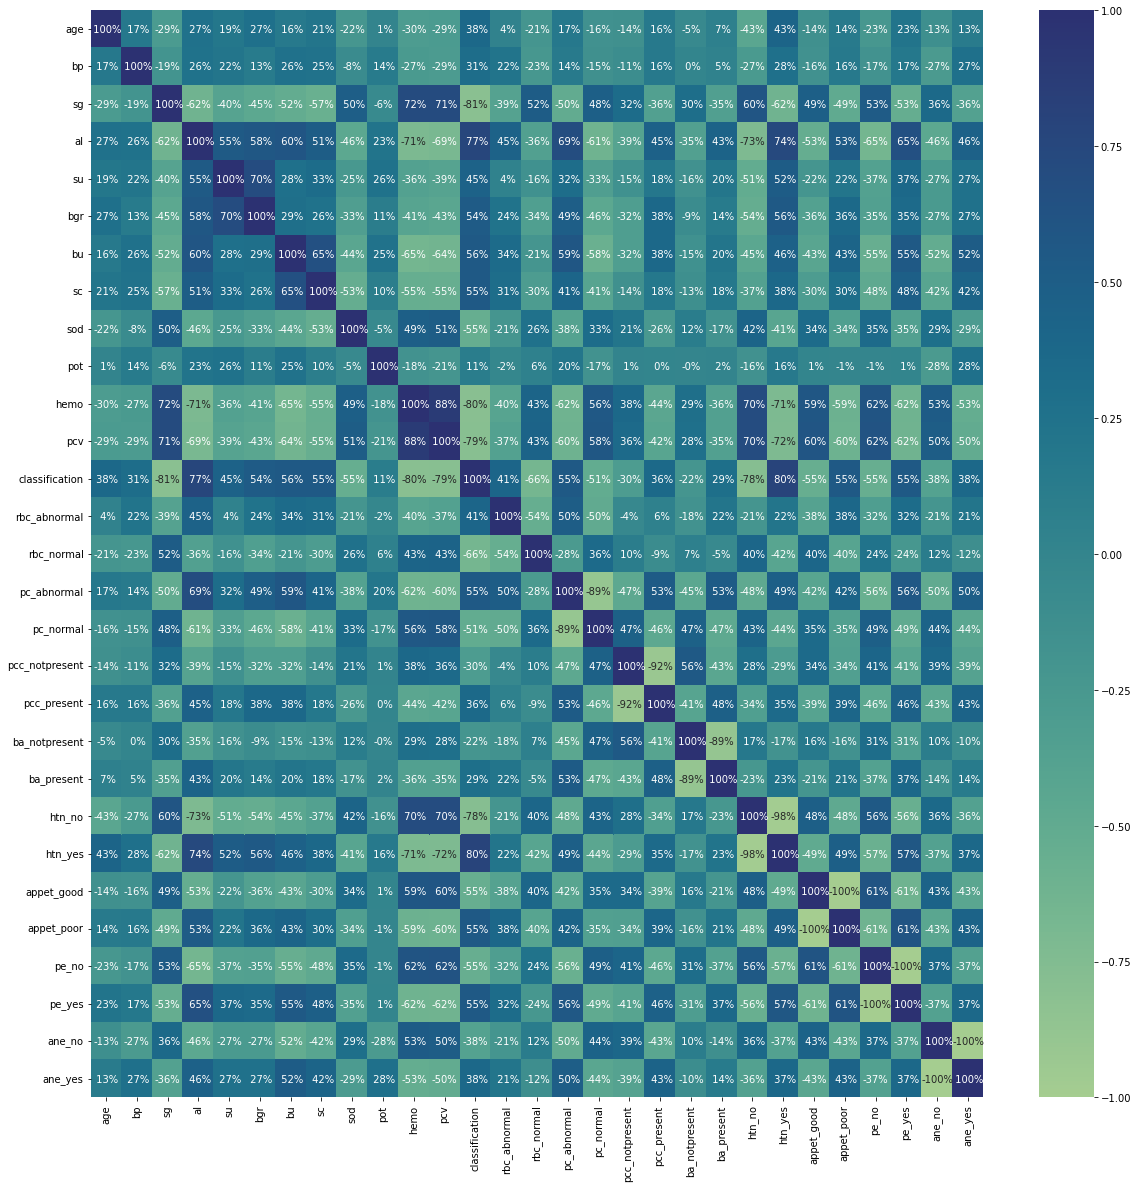

In [275]:
plt.figure(figsize=(20,20))
sns.heatmap(p.corr(),cmap="crest",annot=True,fmt=" .0%")

In [230]:
p.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,1
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,1
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,0
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,1


In [231]:
type(p['age'])

p['age'].shape

(280,)

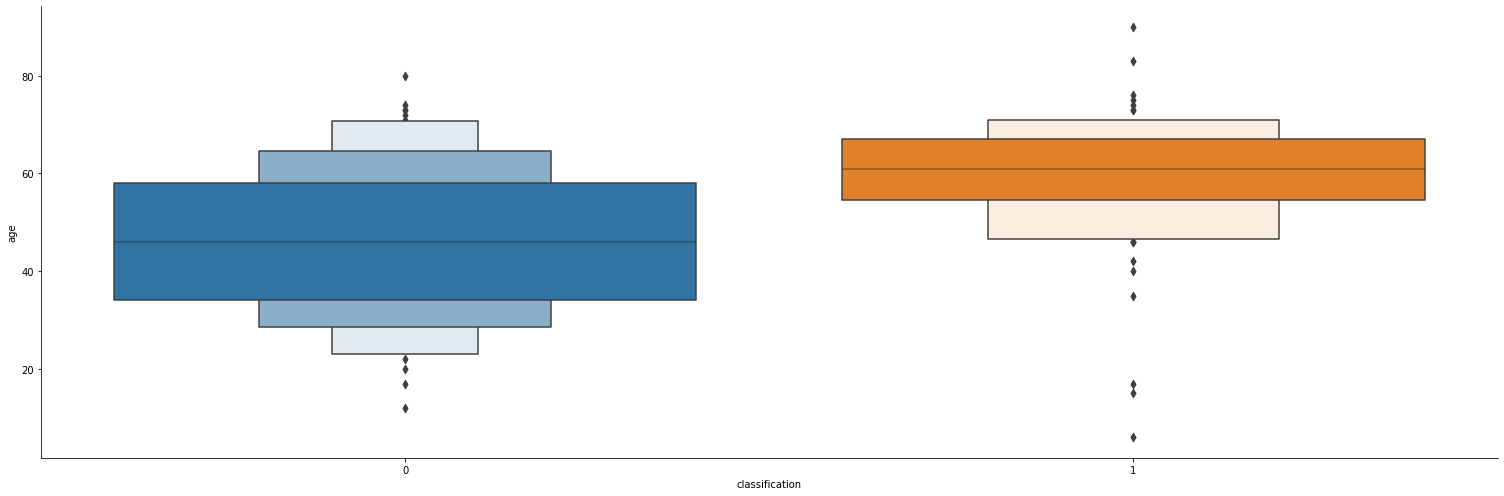

In [273]:
sns.catplot(x='classification' , y='age', data=p.sort_values("age"),kind="boxen",height=7,aspect=3)


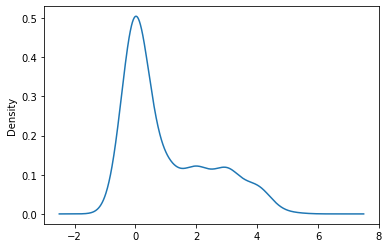

In [233]:
p['al'].plot.density()

In [234]:
p.drop(columns=['wc','rc','dm','cad','id'],inplace=True)

In [235]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [236]:
dummies = list(p.select_dtypes('object').columns) # create dummies and drop drop_first !
dummies

['rbc', 'pc', 'pcc', 'ba', 'htn', 'appet', 'pe', 'ane']

In [237]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [238]:
p = pd.get_dummies(p,columns=dummies)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
1,54.0,70.0,NaN,NaN,NaN,233.0,50.1,1.9,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,47.0,80.0,NaN,NaN,NaN,114.0,87.0,5.2,139.0,3.7,...,1,0,0,1,0,1,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
4,42.0,100.0,1.015,4.0,0.0,NaN,50.0,1.4,129.0,4.0,...,0,1,0,1,0,1,1,0,1,0


In [239]:
correlation = abs(p.corr().sort_values(by='classification')['classification'])
correlation

sg                0.757986
hemo              0.756028
pcv               0.727636
rbc_normal        0.684856
htn_no            0.580132
pc_normal         0.500231
appet_good        0.416242
pe_no             0.368337
sod               0.354435
ane_no            0.318642
pcc_notpresent    0.175150
ba_notpresent     0.102111
pot               0.101139
ba_present        0.192148
pcc_present       0.249717
age               0.256630
rbc_abnormal      0.265302
bp                0.276949
sc                0.285913
ane_yes           0.318642
su                0.352065
pc_abnormal       0.359476
bu                0.365920
pe_yes            0.368337
appet_poor        0.416242
bgr               0.446966
htn_yes           0.590838
al                0.635497
classification    1.000000
Name: classification, dtype: float64

In [240]:
select = list(correlation[correlation > 0.3].index)
select

['sg',
 'hemo',
 'pcv',
 'rbc_normal',
 'htn_no',
 'pc_normal',
 'appet_good',
 'pe_no',
 'sod',
 'ane_no',
 'ane_yes',
 'su',
 'pc_abnormal',
 'bu',
 'pe_yes',
 'appet_poor',
 'bgr',
 'htn_yes',
 'al',
 'classification']

In [241]:
p[select].isnull().sum()

sg                36
hemo              39
pcv               51
rbc_normal         0
htn_no             0
pc_normal          0
appet_good         0
pe_no              0
sod               67
ane_no             0
ane_yes            0
su                38
pc_abnormal        0
bu                14
pe_yes             0
appet_poor         0
bgr               33
htn_yes            0
al                35
classification     0
dtype: int64

In [242]:
#p.fillna(0,inplace=True) 
#p.head()
p.dropna(how='any',inplace=True)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
6,29.0,80.0,1.020,0.0,0.0,83.0,49.0,0.9,139.0,3.3,...,1,0,1,0,1,0,1,0,1,0
10,56.0,60.0,1.025,0.0,0.0,132.0,18.0,1.1,147.0,4.7,...,1,0,1,0,1,0,1,0,1,0
12,42.0,80.0,1.020,0.0,0.0,98.0,20.0,0.5,140.0,3.5,...,1,0,1,0,1,0,1,0,1,0


In [243]:
p.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
classification    0
rbc_abnormal      0
rbc_normal        0
pc_abnormal       0
pc_normal         0
pcc_notpresent    0
pcc_present       0
ba_notpresent     0
ba_present        0
htn_no            0
htn_yes           0
appet_good        0
appet_poor        0
pe_no             0
pe_yes            0
ane_no            0
ane_yes           0
dtype: int64

In [244]:
X = p.drop(columns='classification')    # Split label and datsets
y = p['classification']

In [245]:
X.to_csv('kidney.csv')
X.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age     bp     sg     al     su    bgr     bu     sc    sod    pot  \
0    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
12   False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
273  False  False  False  False  False  False  False  False  False  False   
275  False  False  False  False  False  False  False  False  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False  False  False  False  False   

     ...  ba_

In [246]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [248]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [249]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)

GaussianNB()

In [250]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
model2=DecisionTreeRegressor() 
model3=DecisionTreeClassifier()
model2.fit(X_train,y_train) 

DecisionTreeRegressor()

In [251]:
X_train

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
213,51.0,60.0,1.020,0.0,0.0,129.0,25.0,1.2,139.0,5.0,...,1,0,1,0,1,0,1,0,1,0
98,57.0,60.0,1.020,0.0,0.0,132.0,18.0,1.1,150.0,4.7,...,1,0,1,0,1,0,1,0,1,0
226,22.0,60.0,1.025,0.0,0.0,97.0,18.0,1.2,138.0,4.3,...,1,0,1,0,1,0,1,0,1,0
248,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,1,0,0,1,1,0,1,0,1,0
185,48.0,80.0,1.015,0.0,2.0,214.0,24.0,1.3,140.0,4.0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,61.0,70.0,1.025,0.0,0.0,120.0,29.0,0.7,137.0,3.5,...,1,0,1,0,1,0,1,0,1,0
204,52.0,80.0,1.025,0.0,0.0,99.0,25.0,0.8,135.0,3.7,...,1,0,1,0,1,0,1,0,1,0
31,23.0,80.0,1.020,0.0,0.0,99.0,46.0,1.2,142.0,4.0,...,1,0,1,0,1,0,1,0,1,0
179,30.0,80.0,1.020,0.0,0.0,131.0,38.0,1.0,147.0,3.8,...,1,0,1,0,1,0,1,0,1,0



STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
LogisticRegression()
> 
THEY GIVEN THE WORKING MESSAGE FOR US BECAUSE OUR DATASET SHOULD BE IN THE FORM OF O'S AND 1'S .SO WE HAVE SCALE THEM




In [252]:
scaler = MinMaxScaler()

In [253]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

NOW THE SCALEING PART OVER SO WE HAVE FIT AND RUN OUR ALGORITHM


In [254]:
y_train

213    0
98     0
226    0
248    1
185    1
      ..
146    0
204    0
31     0
179    0
196    0
Name: classification, Length: 108, dtype: int64

In [256]:
X_train.shape

(108, 28)

In [257]:
#model.predict(X_test)
X_train

array([[0.5       , 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.57692308, 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.12820513, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14102564, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ]])

#Predict using Logistic Regression

In [258]:
model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [259]:
model.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9166666666666666

#Prediction using SVM

In [260]:
model1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [261]:
model1.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.4444444444444444

#Decision_Tree

In [262]:
model2.predict(X_test) 
model3.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


DecisionTreeClassifier()

In [263]:
model2.score(X_test,y_test ) #decision tree Regressor

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


-1.25

In [264]:
model3.score(X_test,y_test)#decison tree classifier

1.0

In [265]:
model3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.92502603, 0.        , 0.        ,
       0.07497397, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

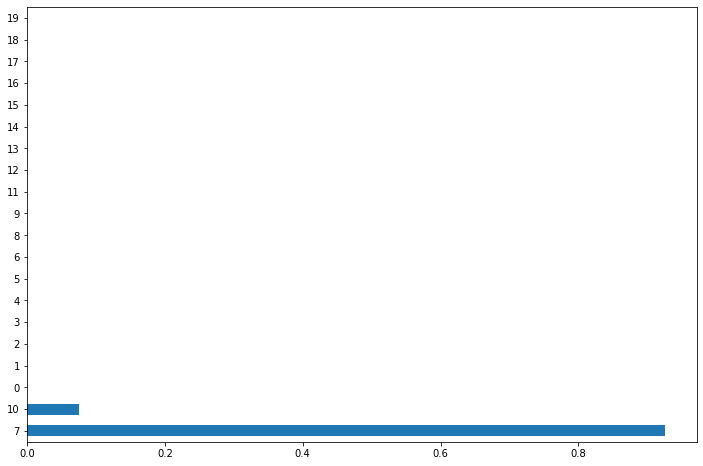

In [266]:
plt.figure(figsize = (12,8))
# feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

important=pd.Series(model3.feature_importances_)
important.nlargest(20).plot(kind="barh")

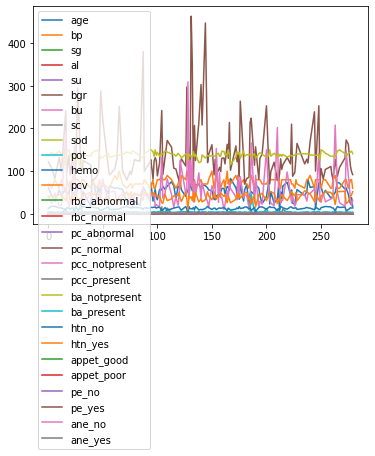

In [267]:
from matplotlib import pyplot
X.plot()

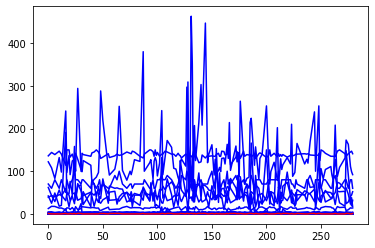

In [268]:
plt.plot(X,color="blue")
plt.plot(y,color="red")

In [269]:
value=p['classification'].value_counts()
value

0    85
1    59
Name: classification, dtype: int64

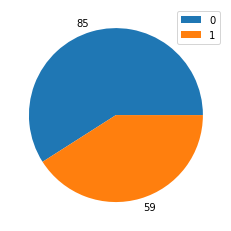

In [270]:
plt.pie(value,labels=value)
plt.legend(value.keys().tolist())